# Importar Bibliotecas

In [1]:
# Mudar diretório para chamar scripts com funções
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')

# Importar funções e flags definidas em flags.py e functions.py
from functions import *
from flags import * 

import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import HTML
import webbrowser
from collections import defaultdict
import networkx as nx

plt.rcParams['figure.figsize'] = (7,5)

# Ligação à base de dados

In [2]:
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")

cur = conn.cursor()

In [3]:
cur.execute('''ROLLBACK;''')

# R031 : Comparação entre Preço Base e Preço Contratual em Concursos Públicos

In [4]:
# Filtrar contratos : ID's concursos públicos com CPV's começados por 72
cpub = (cpv('72', 'Concurso público'))

In [5]:
# Dataframe referente ao conjuntos de contratos públicos celebrados no ramo de consultoria IT 
cp = contratos(cpub)

In [6]:
# A tabela é representada de forma correta : o id do anúncio bate certo com o preço base, contratual e restantes colunas que são relevantes
# Contudo, a ordem dos ID's em cpub é diferente da ordem dos ids na coluna ID da dataframe
# A ordem os id's guardados na variável cpub não bate certo
# Na célula a seguir a esta, é preciso redefini-la
cp = cp.rename(columns={0:'ID', 1:'NrAnuncio', 2:'PrecoBase', 3:'Prazo', 16:'DataPub', 17:'DataCel', 18:'PrecoContratual',20:'Adjudicante', 22:'Adjudicatária' ,23:'EntConcorrentes'})

cp.PrecoBase.replace('None',0).astype(float)
cp.PrecoContratual.replace('None',0).astype(float)

P = cp.head(10)
h(P)

ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,10,11,12,13,14,15,DataPub,DataCel,PrecoContratual,19,Adjudicante,21,Adjudicatária,EntConcorrentes,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
10323405,15555/2023,137670.00,6,False,6699898,13437191,2023-09-19,182,2,False,False,https://dre.pt/application/file/221829278,Anúncio de procedimento,Concurso público,Contratualização de uma Plataforma Educacional de Aprendizagem Digital,2023-11-02,2023-10-31,113524.80,332,Município de Santarém (505941350)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1785),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos","Porto Editora, S.A. (500221103)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=585)",None,https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=356587,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjgwNTc4,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2071168&ext=.pdf,false,72212190-7,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software para ensino,Principal,113524.8,Contratualização de uma Plataforma Educacional de Aprendizagem Digital,Não aplicável,None,"Portugal, Santarém, Santarém",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1699382733
10322139,13241/2023,592500.00,36,False,6640568,13311154,2023-08-04,151,2,False,False,https://dre.pt/application/file/216770781,Anúncio de procedimento,Concurso público,"Concurso Público, com Publicidade Internacional, para a Aquisição de Serviços de instalação e manutenção de uma infraestrutura tecnológica em ""cloud"" de suporte ao sistema de informação aplicacional Oracle da LIPOR",2023-11-02,2023-11-02,521150.00,547,Associação de Municípios para a Gestão Sustentável de Resíduos do Grande Porto - LIPOR (501394192)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=390),"Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","OPTIMIZER – SERVIÇOS E CONSULTADORIA INFORMÁTICA, LDA. (504775936)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=10540)",None,https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=353643,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2501553,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2070929&ext=.pdf,false,72300000-8,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços relacionados com dados,Principal,521150.0,"Concurso Público, com Publicidade Internacional, para a Aquisição de Serviços de instalação e manutenção de uma infraestrutura tecnológica em ""cloud"" de suporte ao sistema de informação aplicacional Oracle da LIPOR",Não aplicável,None,"Portugal, Porto, Gondomar",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1699384415
10324626,15934/2023,150151.14,3,False,6708714,13455812,2023-09-25,186,2,False,False,https://dre.pt/application/file/222052596,Anúncio de procedimento,Concurso público,Concurso público para a aquisição/renovação da manutenção e atualização de licenças software Microsoft Enterprise Agreement n.º 5124030,2023-11-03,2023-10-25,150436.69,366,Município de Valongo (501138960)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=505),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos","CLARANET II SOLUTIONS, S.A. (510728189)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=454083)",None,https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=357085,https://www.anogov.com/cm-valongo/faces/app/acessoDocs.jsp?codigoAcesso=ttttTrpyFOLQUTb9qqoQboILE9kaGimwiSbDD6zByOTDIOEXfN,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2071421

In [7]:
cpub = tuple(cp.ID)

In [8]:
# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72

# Desta forma, ambos os preços são ordenados por ordem decrescente relativamente ao índice
#pb = preco_base3(cpub)
#pc = preco_contrato3(cpub)

# É preferível obter os preços a partir da dataframe visto que não há enganos assim
pb = np.array(cp.PrecoBase.replace('None', 0).astype(float))
pc = np.array(cp.PrecoContratual.replace('None', 0).astype(float))

pb[0], pc[0], cpub[0]

(137670.0, 113524.8, '10323405')

In [9]:
# Conjunto de flags disparadas para o conjunto de contratos em causa
# Largura de 10% em torno do preço base - 0.1
# Rácio máximo aceitável entre preço base e contratual de 10
f = redflag(pb, pc, 0.1, cpub, 10,cp)
f

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: divide by zero encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: invalid value encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:587: RuntimeWarning: divide by zero encountered in scalar divide
  div[i] = pbase[i]/pcont[i]


(('10324626',),
 ('10325177',),
 ('9421165',),
 ('10326579',),
 ('10270055',),
 ('10271560',),
 ('10271100',),
 ('10273533',),
 ('10285558',),
 ('9431380',),
 ('10281471',),
 ('10280297',),
 ('9430883',),
 ('10285595',),
 ('10293359',),
 ('9433230',),
 ('10296443',),
 ('10295857',),
 ('10295337',),
 ('10299255',),
 ('10297391',),
 ('9424006',),
 ('10306289',),
 ('9426454',),
 ('9426264',),
 ('10308597',),
 ('10307803',),
 ('10333899',),
 ('10333427',),
 ('10333165',),
 ('10336036',),
 ('10335504',),
 ('10314211',),
 ('10313923',),
 ('10316944',),
 ('10315878',),
 ('9434400',),
 ('10318582',),
 ('10321490',),
 ('10337405',),
 ('10337328',),
 ('9426666',),
 ('9438124',),
 ('10223302',),
 ('10230715',),
 ('9448901',),
 ('9445291',),
 ('10236262',),
 ('10238682',),
 ('10238348',),
 ('10340573',),
 ('9439373',),
 ('10240705',),
 ('10240047',),
 ('10242471',),
 ('9438902',),
 ('10246096',),
 ('9441695',),
 ('9447553',),
 ('10247839',),
 ('10252068',),
 ('10249994',),
 ('10257153',),
 ('10256

In [10]:
cp.DataCel = pd.to_datetime(cp.DataCel)
cp.DataPub = pd.to_datetime(cp.DataPub)


print(cp.DataCel.min())
print(cp.DataCel.max())

print()

print(cp.DataPub.min())
print(cp.DataPub.max())

2018-04-16 00:00:00
2023-12-05 00:00:00

2022-05-02 00:00:00
2023-12-06 00:00:00


## Análise do preço base

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

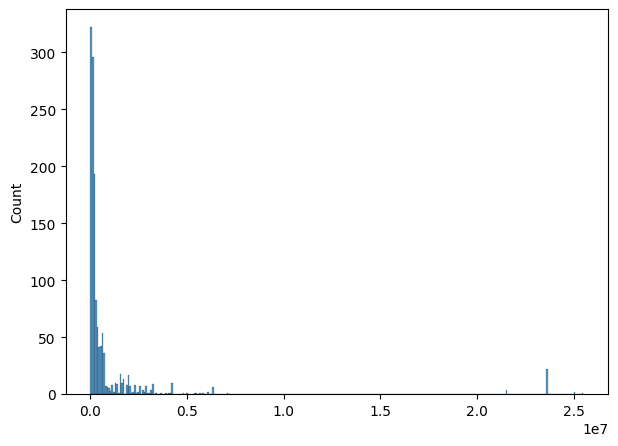

In [11]:
sns.histplot(pb)
plt.plot()

## Análise do preço contratual

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

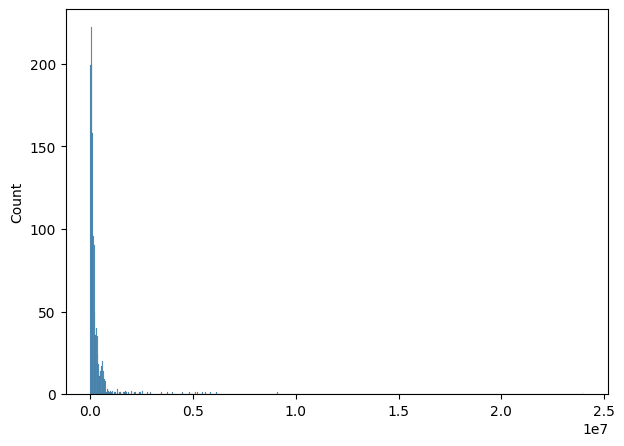

In [12]:
sns.histplot(pc)
plt.plot()

In [13]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.replace('None',0).astype('float')

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

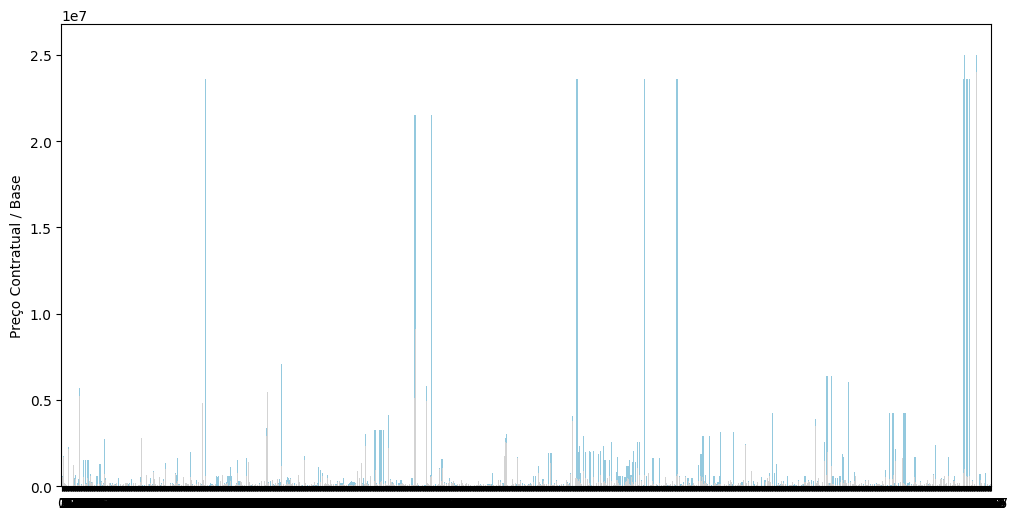

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

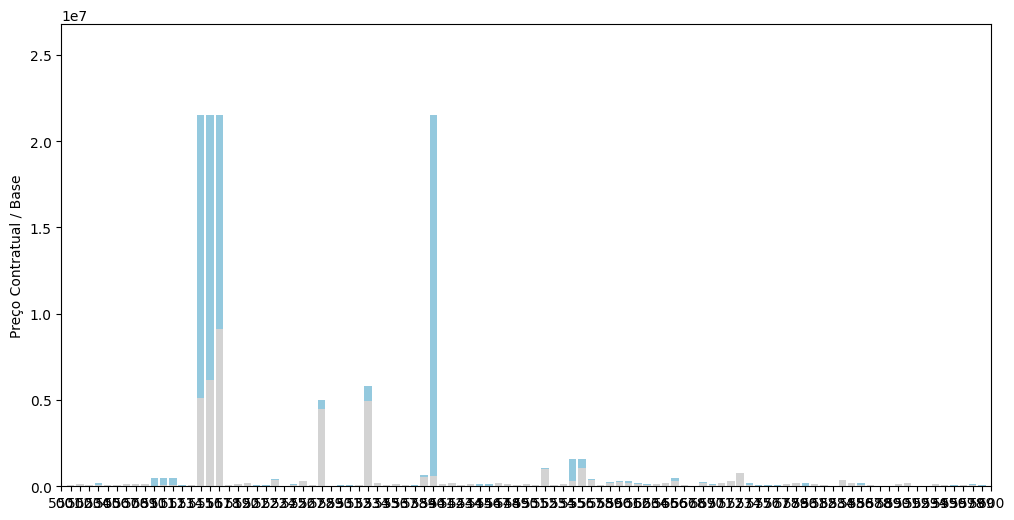

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.xlim(500,600)
plt.show()

/tmp/ipykernel_18193/84178919.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.boxplot(pb/pc)
/tmp/ipykernel_18193/84178919.py:1: RuntimeWarning: invalid value encountered in divide
  sns.boxplot(pb/pc)


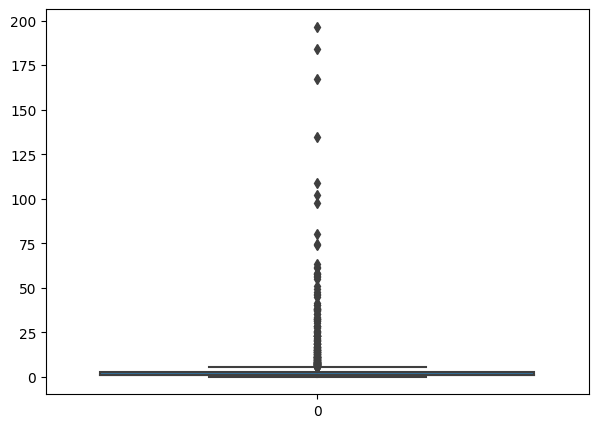

In [16]:
sns.boxplot(pb/pc)
plt.show()

/tmp/ipykernel_18193/3234519312.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.histplot(pb/pc)
/tmp/ipykernel_18193/3234519312.py:1: RuntimeWarning: invalid value encountered in divide
  sns.histplot(pb/pc)
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


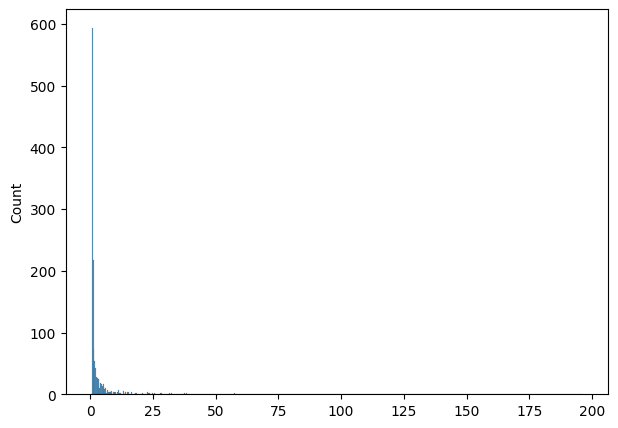

In [17]:
sns.histplot(pb/pc)
plt.show()

## Tratamento dos lotes

In [18]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([ 636, 1008, 1135, 1139, 1224]),)

In [19]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

/tmp/ipykernel_18193/2437271471.py:4: RuntimeWarning: divide by zero encountered in divide
  (np.round(pb/pc, 4))
/tmp/ipykernel_18193/2437271471.py:4: RuntimeWarning: invalid value encountered in divide
  (np.round(pb/pc, 4))


array([ 1.213,  1.137,  0.998, ..., 20.306,  1.017,  1.   ])

***

<br>

<br>

Verificar a situação em que o preco base é muito maior do que o preço contratual

1. pegar no maior valor do rácio pb/pc
2. verificar pb e pc e verificar rácio
4. obter id e verificar que bate certo usando o função contrato()
5. obter o número de anúncio
6. calcular o número de ocorrências do anúncio
7. obter id's para o mesmo número de anúncio
8. somar precos contratuais
9. comparar novamente com o preço base


**1.**

In [20]:
# Índice do contrato com maior rácio 
rat = pb/pc
rat5 = np.where(rat > 5)[0]

print(np.where(rat > 5), '\n\n', rat[np.where(rat > 5)])

print('\n\n\n Índice do maior rácio :', np.where(rat > 30)[0])

(array([  18,   19,   21,   25,   30,   35,   39,   43,   50,   51,   55,
         57,   59,   60,   83,   84,   98,  102,  113,  118,  119,  121,
        132,  158,  169,  170,  196,  208,  210,  226,  228,  229,  243,
        244,  245,  246,  248,  305,  318,  321,  371,  375,  386,  425,
        426,  428,  441,  446,  457,  464,  465,  466,  467,  468,  469,
        470,  489,  510,  511,  512,  522,  540,  576,  577,  580,  615,
        629,  664,  690,  691,  692,  700,  711,  712,  713,  715,  729,
        752,  753,  754,  755,  756,  757,  763,  764,  766,  767,  771,
        772,  776,  780,  782,  783,  784,  786,  791,  792,  793,  794,
        798,  799,  803,  804,  814,  815,  816,  817,  819,  821,  822,
        824,  829,  831,  833,  834,  835,  837,  838,  839,  851,  853,
        854,  855,  856,  863,  864,  873,  890,  891,  894,  896,  897,
        898,  899,  900,  904,  914,  920,  921,  928,  929,  931,  934,
        936,  937,  938,  944,  945,  946,  952,  

/tmp/ipykernel_18193/2939907773.py:2: RuntimeWarning: divide by zero encountered in divide
  rat = pb/pc
/tmp/ipykernel_18193/2939907773.py:2: RuntimeWarning: invalid value encountered in divide
  rat = pb/pc


**2.**

In [21]:
i = 131
pb[i],pc[i], pb[i]/pc[i]

(80450.0, 80000.0, 1.005625)

**3.**

In [22]:
j = (cpub[i])[0]

Cc = contrato(j)
Cc

""


**4**

In [23]:
n_anuncio = Cc.iloc[:,1][0]
n_anuncio

IndexError: single positional indexer is out-of-bounds

**5.**

In [ ]:
np.where(cp.NrAnuncio == n_anuncio) 

In [ ]:
contrato(cpub[131])

In [ ]:
contrato(cpub[156])

## Demonstração

In [12]:
# Datas de Publicação mais frequentes
print( cp.DataPub.apply(pd.to_datetime).dt.date.value_counts())

DataPub
2022-12-16    35
2023-09-07    15
2023-06-28    12
2023-04-05    12
2023-07-03    12
              ..
2023-11-25     1
2023-04-03     1
2022-10-20     1
2022-12-21     1
2023-02-10     1
Name: count, Length: 376, dtype: int64


In [13]:
# Filtrar contratos publicados no dia 2023-09-07
demo = cp.loc[cp['DataPub'] == '2023-09-07'].reset_index()
h(demo)

index,ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,10,11,12,13,14,15,DataPub,DataCel,PrecoContratual,19,Adjudicante,21,Adjudicatária,EntConcorrentes,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
112,10230715,11518/2023,77240.00,9,False,6588510,13215291,2023-07-11,133,2,False,False,https://dre.pt/application/file/215488979,Anúncio de procedimento,Concurso público,Aquisição de serviços tecnológicos especializados para caracterização e digitalização do Parque Natural de Montesinho (PNM),2023-09-07,2023-08-30,71725.00,153,Instituto Politécnico de Bragança (600013758)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=9280),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos","MORE - Laboratório Colaborativo Montanhas de Investigação, Associação (514840960)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=3541760)",Socarto - Sociedade de Levantamentos Topo Cartográficos Lda (500676020),https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=352037,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjQ3Mzg4,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2054125&ext=.pdf,false,72600000-6,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de consultoria e assistência informáticas,Principal,71725.0,Aquisição de serviços tecnológicos especializados para caracterização e digitalização do Parque Natural de Montesinho (PNM),Não aplicável,None,"Portugal, Braganca, Bragança",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1701116476
113,10230212,867/2023,598474.80,30,True,6427083,12870630,2023-04-20,78,2,False,False,https://dre.pt/application/file/212076392,Aviso de prorrogação de prazo,Concurso público,Serviços de Desenvolvimento para o Produto SIGLIC 2.0 do Pilar 3 - Reforma dos SI Disponibilizados ao Profissional (PRR) -Lote 1- Gestor de Projeto de Desenvolvimento de Software,2023-09-07,2023-08-24,74844.00,490,"SPMS - Serviços Partilhados do Ministério da Saúde, E. P. E. (509540716)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=190896)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","IGNÍT PEOPLE, S.A., (515777048)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=3696569)","Syone SA (504729624)|||CAPGEMINI PORTUGAL, S.A. (504272179)|||IDW - Consultoria em Serviços de Informação, Lda (504243926)|||Boldint, S.A. (509216595)|||Dellent Consulting, Lda (513266488)|||Winning, Lda (510098711)|||Sys-Match - Consultores de Sistemas de Informação, Lda (504665901)|||Konica Minolta Business Solutions Portugal, Unipessoal, Lda (502120070)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=344008,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2329980,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2054050&ext=.pdf,false,72500000-0,False,None,None,True,False,None,False,None,False,Aquisição de serviços,Serviços relacionados com a informática,Principal,74844.0,Serviços de Desenvolvimento para o Produto SIGLIC 2.0 do Pilar 3 - Reforma dos SI Disponibilizados ao Profissional (PRR) -Lote 1- Gestor de Projeto de Desenvolvimento de Software,Não aplicável,None,"Portugal, Porto<BR/>Portugal, Lisboa",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",Plano de Recuperação e Resiliência (PRR) – artigo 6º da Lei n.º30/2021,None,1701117075
115,10228484,5330/2023,546000.00,30,False,6427159,12870832,2023-04-03,66,2,False,False,https://dre.pt/application/file/211344046,Anúncio de procedimento,Concurso público,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em

In [14]:
indices = tuple(demo.ID)
preco_b = np.array(demo.PrecoBase.astype(float))
preco_c = np.array(demo.PrecoContratual.astype(float))

flags = redflag(preco_b, preco_c, 0.1, indices, 10, demo)
flags

(('10230715',), ('10230712',), ('10230172',), ('10228718',))

In [15]:
demo.loc[demo.ID.isin(['10230715', '10230712', '10230172', '10228718']), ['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

,ID,NrAnuncio,PrecoBase,PrecoContratual
0,10230715,11518/2023,77240.00,71725.00
3,10230712,7712/2023,202642.00,202606.44
10,10230172,8223/2023,3139486.56,150184.80
13,10228718,7550/2023,26377.20,26337.20


In [16]:
demo1 = demo.loc[:,['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

demo1['Diferença'] = 0
demo1['Diferença'] = preco_b - preco_c


demo1['Dif %'] = ''
demo1['Dif %'] = difrel(preco_b, preco_c).round(3)


# Criar nova coluna para as flags com valor inicial 0 para todos os contratos
demo1['Flag'] = 0  
demo1.loc[demo1['ID'].isin(['10230715', '10230712', '10230172', '10228718']), 'Flag'] = 1

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Dif %,Flag
0,10230715,11518/2023,77240.00,71725.00,5515.00,7.140,1
1,10230212,867/2023,598474.80,74844.00,523630.80,87.494,0
2,10228484,5330/2023,546000.00,232500.00,313500.00,57.418,0
3,10230712,7712/2023,202642.00,202606.44,35.56,0.018,1
4,10230635,8210/2023,152743.50,48699.00,104044.50,68.117,0
5,10230582,8210/2023,152743.50,58180.50,94563.00,61.910,0
6,10230556,7679/2023,222165.81,67774.00,154391.81,69.494,0
7,10230493,6846/2023,266976.00,116046.00,150930.00,56.533,0
8,10230326,867/2023,598474.80,129729.60,468745.20,78.323,0
9,10230288,867/2023,598474.80,111342.00,487132.80,81.396,0


In [17]:
percentage = flagconti(tuple(demo1.ID))

demo1['FlagCont'] = ''
demo1['FlagCont'] = percentage[3].round(3)

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Dif %,Flag,FlagCont
0,10230715,11518/2023,77240.00,71725.00,5515.00,7.140,1,0.114
1,10230212,867/2023,598474.80,74844.00,523630.80,87.494,0,0.114
2,10228484,5330/2023,546000.00,232500.00,313500.00,57.418,0,0.738
3,10230712,7712/2023,202642.00,202606.44,35.56,0.018,1,0.154
4,10230635,8210/2023,152743.50,48699.00,104044.50,68.117,0,0.530
5,10230582,8210/2023,152743.50,58180.50,94563.00,61.910,0,0.881
6,10230556,7679/2023,222165.81,67774.00,154391.81,69.494,0,0.699
7,10230493,6846/2023,266976.00,116046.00,150930.00,56.533,0,0.564
8,10230326,867/2023,598474.80,129729.60,468745.20,78.323,0,0.500
9,10230288,867/2023,598474.80,111342.00,487132.80,81.396,0,0.100


## Valor Flag Contínuo

In [18]:
Pb = np.array(cp.PrecoBase.replace('None',0).astype(float))
Pc = np.array(cp.PrecoContratual.replace('None',0).astype(float))

(Pb[0] - Pc[0])/Pb[0] * 100

17.538461538461537

In [19]:
Xx = np.where(difrel(Pb,Pc)/100 > 1)

print(Pb[Xx], Pc[Xx])

[12000.] [100000.]


/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:641: RuntimeWarning: invalid value encountered in divide
  return abs(a-b)/a * 100


In [20]:
difrel(Pb[Xx], Pc[Xx])

array([733.33333333])

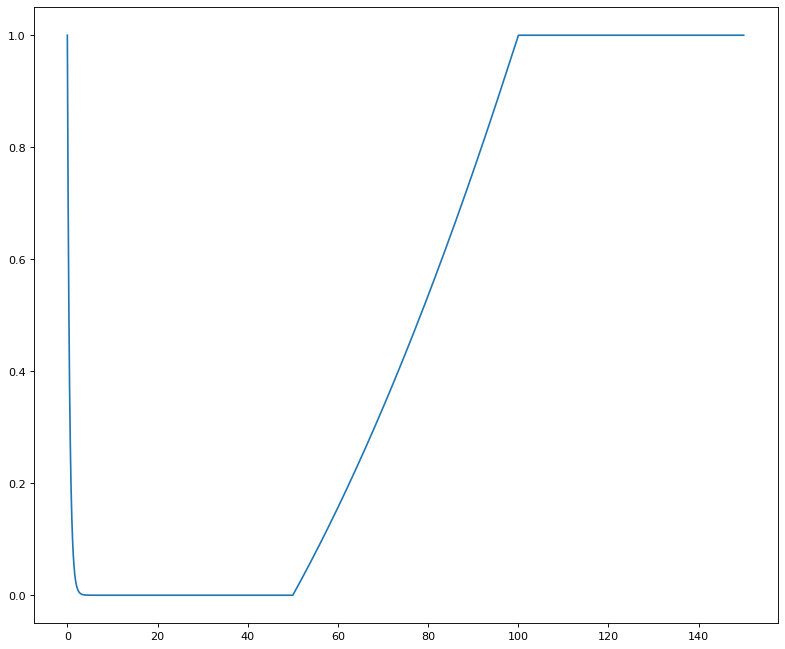

In [21]:
from matplotlib.pyplot import figure

x = np.linspace(0,150,10000)
figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x,fun(x))
plt.show()

# R003 : Análise Prazo de Candidatura

In [22]:
# Se o prazo de candidatura for inferior a 6 dias é ativada a flag
flags1 = prazo(cp)
flags1

('10324626',
 '10271100',
 '10333181',
 '10318582',
 '9426666',
 '9438902',
 '10103775',
 '10118819',
 '10345354',
 '10063214',
 '10096080',
 '9986637',
 '9990308',
 '9995605',
 '10010576',
 '10041743',
 '9915178',
 '9953348',
 '10349581',
 '9747980',
 '9749656',
 '9796559',
 '9895495',
 '9800786',
 '9901639',
 '9811823',
 '9825462',
 '9824923',
 '9823998',
 '9827137',
 '9664681',
 '9629534',
 '9634039',
 '9633292',
 '9633086',
 '9636192',
 '9660715',
 '9566187',
 '9565472',
 '9577292',
 '9399551',
 '9484310',
 '9248758',
 '9248720',
 '9248692',
 '9254144',
 '9271061',
 '9302057',
 '9338720',
 '9374001',
 '9387484',
 '10376734')

In [23]:
# Os elementos de prazo que aparecem vazios correspondem a entradas não preenchidas aquando do preenchimento no basegov
df_prazo = cp.loc[cp.ID.isin(prazo(cp)), ['ID', 'NrAnuncio', 'DataPub','DataCel','Prazo']]
df_prazo

,ID,NrAnuncio,DataPub,DataCel,Prazo
2,10324626,15934/2023,2023-11-03,2023-10-25,3
14,10271100,491/2023,2023-10-02,2023-09-08,
77,10333181,1253/2023,2023-11-09,2023-07-07,5
95,10318582,1195/2022,2023-10-30,2022-12-20,3
104,9426666,424/2022,2022-08-29,2022-08-28,
137,9438902,451/2022,2022-09-07,2022-09-06,
239,10103775,1090/2023,2023-07-03,2023-06-29,5
268,10118819,478/2023,2023-07-12,2023-07-03,4
295,10345354,2205/2023,2023-11-16,2023-11-16,4
340,10063214,154/2022,2023-06-07,2022-05-02,


In [24]:
# f : conjunto de todas as flags disparadas quando é comparado o preço base com o preço contratual
X = tuple(sub[0] for sub in f)
X = np.array(tuple(int(item) for item in X))

# Verificar quais os indices onde ocorrem flags para prazos de candidaturas inferiores a 6 dias
Y = np.array(tuple(int(item) for item in prazo(cp)))

# Queremos ver onde há overlap de flags
xy = np.where(np.isin(Y,X))[0]
xy

array([ 0,  1,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 15, 17, 19, 20, 21,
       22, 24, 25, 28, 30, 32, 33, 34, 35, 36, 38, 41, 46, 47, 48, 50])

In [25]:
df_prazo['PrecoBase'] = (cp.loc[cp.ID.isin(flags1),'PrecoBase']).replace('None',0).astype(float)
df_prazo['PrecoContratual'] = cp.loc[cp.ID.isin(flags1),'PrecoContratual'].replace('None',0).astype(float)
df_prazo['Diferença'] = df_prazo.PrecoBase - df_prazo.PrecoContratual
df_prazo['DifPercentual ( % )'] = difrel(df_prazo.PrecoBase, df_prazo.PrecoContratual).round(1)


df_prazo['Flag'] = ''
df_prazo.loc[df_prazo.index[xy],'Flag'] = 1


df_prazo['FlagCont'] = ''
perc = flagconti(tuple(df_prazo.ID))[3].round(3)
df_prazo['FlagCont'] = perc


df_prazo

,ID,NrAnuncio,DataPub,DataCel,Prazo,PrecoBase,PrecoContratual,Diferença,DifPercentual ( % ),Flag,FlagCont
2,10324626,15934/2023,2023-11-03,2023-10-25,3,150151.14,150436.69,-285.55,0.2,1,0.000
14,10271100,491/2023,2023-10-02,2023-09-08,,32880.00,32880.00,0.00,0.0,1,0.999
77,10333181,1253/2023,2023-11-09,2023-07-07,5,139000.00,113829.55,25170.45,18.1,,0.035
95,10318582,1195/2022,2023-10-30,2022-12-20,3,203000.00,201788.42,1211.58,0.6,1,0.980
104,9426666,424/2022,2022-08-29,2022-08-28,,138335.00,130000.00,8335.00,6.0,1,0.001
137,9438902,451/2022,2022-09-07,2022-09-06,,140000.00,138200.00,1800.00,1.3,1,0.000
239,10103775,1090/2023,2023-07-03,2023-06-29,5,109251.00,105247.66,4003.34,3.7,1,1.000
268,10118819,478/2023,2023-07-12,2023-07-03,4,121200.00,111744.00,9456.00,7.8,1,0.303
295,10345354,2205/2023,2023-11-16,2023-11-16,4,32756.00,32756.00,0.00,0.0,1,0.684
340,10063214,154/2022,2023-06-07,2022-05-02,,189280.00,90228.48,99051.52,52.3,,0.000


In [26]:
header = pd.MultiIndex.from_tuples([
    ('Flag 1', 'ID'), ('Flag 1', 'NrAnuncio'), ('Flag 1', 'DataPub'), ('Flag 1', 'DataCel'), ('Flag 1', 'Prazo'),
    ('Flag 2', 'PrecoBase'), ('Flag 2', 'PrecoContratual'), ('Flag 2', 'Diferença') ,('Flag 2', 'DifPercentual ( % )'), ('Flag 2', 'Flag'), ('Flag 2', 'FlagCont')
])


df_prazo.columns = header

#styled_df = df_prazo.style.set_properties(**{
#    'border': '1px solid gray',  # Sets border style and color
#    'text-align': 'left',       # Aligns text in cells
#    'width': '150px',             # Sets width for each cell
#    })

df_prazo

Flag 1                                              Flag 2  \
            ID   NrAnuncio    DataPub    DataCel Prazo   PrecoBase   
2     10324626  15934/2023 2023-11-03 2023-10-25     3   150151.14   
14    10271100    491/2023 2023-10-02 2023-09-08          32880.00   
77    10333181   1253/2023 2023-11-09 2023-07-07     5   139000.00   
95    10318582   1195/2022 2023-10-30 2022-12-20     3   203000.00   
104    9426666    424/2022 2022-08-29 2022-08-28         138335.00   
137    9438902    451/2022 2022-09-07 2022-09-06         140000.00   
239   10103775   1090/2023 2023-07-03 2023-06-29     5   109251.00   
268   10118819    478/2023 2023-07-12 2023-07-03     4   121200.00   
295   10345354   2205/2023 2023-11-16 2023-11-16     4    32756.00   
340   10063214    154/2022 2023-06-07 2022-05-02         189280.00   
397   10096080   1119/2023 2023-06-28 2023-06-27     4   149040.00   
452    9986637    247/2023 2023-05-12 2023-05-10          55000.00   
461    9990308    220/2023 2023-05-16 2023-05-15          74988.00   
471    9995605    459/2023 2023-05-18 2023-05-17     5   770480.00   
481   10010576    212/2023 2023-05-24 2023-05-08         211504.32   
497   10041743    296/2023 2023-05-30 2023-05-29         137786.00   
513    9915178   2307/2022 2023-04-05 2023-04-04     4    60000.00   
554    9953348    219/2023 2023-04-28 2023-04-28         124256.00   
598   10349581   2260/2023 2023-11-20 2023-11-15     3   139000.00   
616    9747980     14/2023 2023-02-01 2023-01-27     4   153000.00   
619    9749656   1996/2022 2023-02-02 2023-02-01     5    76500.00   
640    9796559     20/2023 2023-02-12 2023-02-08          61900.00   
646    9895495   2016/2022 2023-03-29 2023-03-28     2   200000.00   
655    9800786   2457/2022 2023-02-16 2023-02-02     2    74500.00   
666    9901639   2100/2022 2023-03-31 2023-03-14     5  1710720.00   
667    9811823     12/2023 2023-02-20 2023-01-31         110905.50   
672    9825462     48/2023 2023-02-27 2023-02-16         192000.00   
673    9824923     48/2023 2023-02-27 2023-02-16         192000.00   
677    9823998     31/2023 2023-02-27 2023-02-14          98800.00   
683    9827137     90/2023 2023-02-28 2023-02-23         121932.00   
693    9664681    662/2022 2023-01-02 2022-12-29          74993.10   
850    9629534   1837/2022 2022-12-20 2022-12-14     3    75880.00   
858    9634039    645/2022 2022-12-22 2022-12-21          73728.00   
860    9633292    644/2022 2022-12-22 2022-12-21          74988.00   
861    9633086    643/2022 2022-12-22 2022-12-21          74900.00   
867    9636192    647/2022 2022-12-26 2022-12-21          35410.00   
876    9660715   2452/2022 2022-12-29 2022-12-28          74976.00   
907    9566187    581/2022 2022-11-18 2022-11-18          65900.00   
909    9565472     49/2019 2022-11-18 2018-04-16  -393   123830.00   
917    9577292   1236/2022 2022-11-23 2022-11-15     1   210000.00   
1043   9399551   1350/2022 2022-08-04 2022-08-04     2   136811.76   
1110   9484310    489/2022 2022-10-06 2022-09-23          74897.80   
1185   9248758    359/2021 2022-05-10 2022-04-12     3   146000.00   
1186   9248720    359/2021 2022-05-10 2022-04-12     3   146000.00   
1187   9248692    359/2021 2022-05-10 2022-04-12     3   146000.00   
1189   9254144    359/2021 2022-05-12 2022-04-12     3   146000.00   
1205   9271061    659/2022 2022-05-20 2022-05-20     4   184302.00   
1234   9302057    254/2022 2022-06-07 2022-06-07          70000.00   
1277   9338720    281/2022 2022-07-05 2022-06-27         214940.00   
1312   9374001    323/2022 2022-07-18 2022-07-15          65000.00   
1343   9387484    280/2022 2022-07-27 2022-07-25         214996.00   
1351  10376734   2305/2023 2023-12-06 2023-11-29     3    99000.00   

                                                                   
     PrecoContratual  Diferença DifPercentual ( % ) Flag FlagCont  
2          150436.69    -285.55                 0.2    1    0.000  
14          32880.00   

# R018 : Número de Entidades Concorrentes

<StemContainer object of 3 artists>

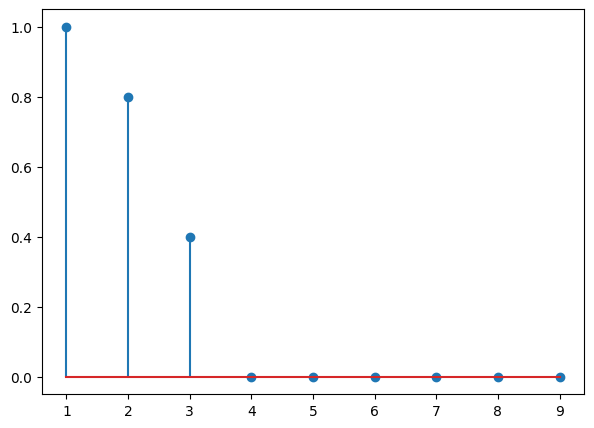

In [27]:
xd = np.arange(1,10,1)
yd = np.array([1,0.8,0.4,0,0,0,0,0,0])

plt.stem(xd,yd)

In [28]:
def nec_classifier(n):
    """
    Número de Entidades Concorrentes : Classificador
    Consoante o número de entidades concorrentes, atribuir um valor entre 0 e 1

    Se o número de entidades concorrentes for superior a 10 empresas é atribuído, automaticamente, um valor de flag 1
    Para valores entre 1 e 10, é atribuído um valor de yd

    Esta função só funciona para um valor de cada vez
    
    Parâmetros:
        n : número de entidades concorrentes para um determinado concurso

    Return:
        float : valor entre 0 e 1
    """

    xd = np.arange(1,10,1)
    yd = np.array([1,0.8,0.4,0,0,0,0,0,0])
        
    if n > 9 :
        return 1

    elif n in xd : 
        return yd[np.where(n == xd)][0]

In [29]:
def nr_entidades(Id):
    """
    Função que, dado o id de um contrato, retorna uma lista com as entidades concorrentes. Desta forma, podemos calcular o número de entidades concorrentes utilizando o comando len()
    Se se der como input apenas um contrato - o id deste irá ter length = 8 visto que cada ID é composto por 8 algarismos - irá ser realizado no primeiro ramo do ciclo if-else
    Se se der um tuplo de ID's irá ser calculado no segundo ramo do ciclo e será retornada uma lista de listas

    Parâmetros:
        Id : id do contrato

    return:
        result : lista com a entidades concorrentes
    """

    if len(Id) == 8:
    
        cur = conn.cursor()
        cur.execute('''
                    SELECT entidades_concorrentes
                    FROM "contratos"
                    WHERE id = %s;''', (Id,))
        
        data = cur.fetchall()
        result = data[0][0].split('|||')
    
        return result

    
    else:
        
        cur = conn.cursor()
        cur.execute('''
                    SELECT entidades_concorrentes
                    FROM "contratos"
                    WHERE id IN %s; ''', (tuple(Id),))
            
        data = cur.fetchall()
        
        n = len(data)
        r = [] 
        result = []
        
        for i in range(n):
            r = data[i][0].split('|||')
            result.append(r)
            
        return result

In [30]:
def redflag3(Id):
    """
    """
    
    n = nr_entidades(Id)
    df = pd.DataFrame({'ID':Id})
    df['NrEntConc'] = ''
    df['FlagNEC'] = ''
    
    for i,j in enumerate(n):
        m = len(j)
        df.NrEntConc[i] = m
        df.FlagNEC[i] = nec_classifier(m)
        
    return df

rflag_nec = redflag3(cp.ID)

In [32]:
h(rflag_nec)

ID,NrEntConc,FlagNEC
10323405,1,1.0
10322139,1,1.0
10324626,1,1.0
10325177,1,1.0
9421165,1,1.0
10327340,2,0.8
10326579,3,0.4
9421039,3,0.4
10270055,1,1.0
9421013,3,0.4


In [33]:
rflag_nec.NrEntConc.astype(int).describe()

count    1358.000000
mean        4.200295
std         5.365322
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        31.000000
Name: NrEntConc, dtype: float64

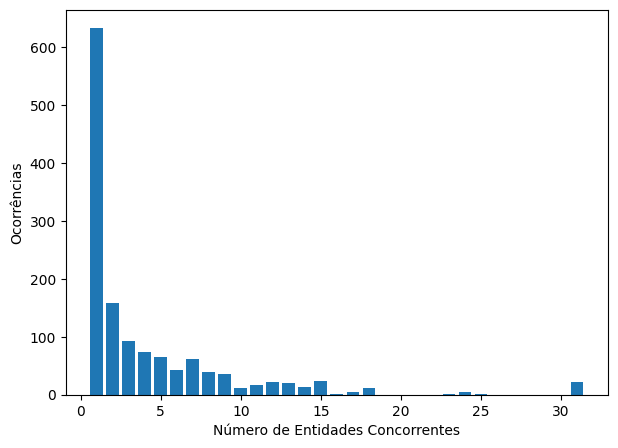

In [34]:
v = pd.Series(rflag_nec.NrEntConc.astype(int)).value_counts()

# Plotting the histogram
plt.bar(v.index, v.values)
plt.xlabel('Número de Entidades Concorrentes')
plt.ylabel('Ocorrências')
plt.show()

# Junção das 3 flags construídas

In [35]:
ndf = cp.loc[:,['ID','NrAnuncio','PrecoBase','PrecoContratual']]

ndf.PrecoBase = ndf.PrecoBase.replace('None',0).astype(float)
ndf.PrecoContratual = ndf.PrecoContratual.replace('None',0).astype(float)

ndf.loc[:,'Diferença'] = ndf.PrecoBase - ndf.PrecoContratual
ndf.loc[:,'DifPercentual'] = difrel(ndf.PrecoBase, ndf.PrecoContratual).round(2)

ff = tuple(item[0] for item in f)

ndf.loc[:,'Flag'] = 0
ndf.loc[ndf.ID.isin(ff) ,'Flag'] = 1

ndf['FlagC1'] = ''
perc = flagconti(tuple(ndf.ID))[3].round(3)
ndf['FlagC1'] = perc

ndf.head(15)

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:641: RuntimeWarning: invalid value encountered in divide
  return abs(a-b)/a * 100


,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,DifPercentual,Flag,FlagC1
0,10323405,15555/2023,137670.00,113524.80,24145.20,17.54,0,0.000
1,10322139,13241/2023,592500.00,521150.00,71350.00,12.04,0,0.000
2,10324626,15934/2023,150151.14,150436.69,-285.55,0.19,1,0.684
3,10325177,1698/2023,1749480.72,1709717.93,39762.79,2.27,1,0.011
4,9421165,9468/2022,195239.58,190664.32,4575.26,2.34,1,0.009
5,10327340,7629/2023,162500.00,102000.00,60500.00,37.23,0,0.000
6,10326579,13658/2023,145000.00,132000.00,13000.00,8.97,1,0.000
7,9421039,4787/2022,100000.00,59187.50,40812.50,40.81,0,0.000
8,10270055,305/2023,118805.00,118805.00,0.00,0.00,1,1.000
9,9421013,4805/2022,107760.00,88578.00,19182.00,17.80,0,0.000


In [36]:
ndf['PrazoCand'] = cp.loc[:,'Prazo']

ndf['PrazoFlag'] = 0
ndf.loc[ndf.ID.isin(flags1), ['PrazoFlag']] = 1

ndf['FlagC2'] = ''

ndf

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,DifPercentual,Flag,FlagC1,PrazoCand,PrazoFlag,FlagC2
0,10323405,15555/2023,137670.00,113524.80,24145.20,17.54,0,0.000,6,0,
1,10322139,13241/2023,592500.00,521150.00,71350.00,12.04,0,0.000,36,0,
2,10324626,15934/2023,150151.14,150436.69,-285.55,0.19,1,0.684,3,1,
3,10325177,1698/2023,1749480.72,1709717.93,39762.79,2.27,1,0.011,36,0,
4,9421165,9468/2022,195239.58,190664.32,4575.26,2.34,1,0.009,9,0,
...,...,...,...,...,...,...,...,...,...,...,...
1353,10376333,2340/2023,3606995.90,2007973.00,1599022.90,44.33,0,0.000,9,0,
1354,9390723,7495/2022,209520.00,200412.00,9108.00,4.35,1,0.000,6,0,
1355,10376227,18381/2023,87516.00,4309.80,83206.20,95.08,0,0.877,6,0,
1356,9390552,7528/2022,150400.00,147840.00,2560.00,1.70,1,0.033,6,0,


In [37]:
nec = redflag3(cpub)
n1 = nec.NrEntConc
n2 = nec.FlagNEC

In [38]:
ndf['NEC'] = n1

ndf['FlagC3'] = ''
ndf.FlagC3 = n2
ndf

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,DifPercentual,Flag,FlagC1,PrazoCand,PrazoFlag,FlagC2,NEC,FlagC3
0,10323405,15555/2023,137670.00,113524.80,24145.20,17.54,0,0.000,6,0,,1,1.0
1,10322139,13241/2023,592500.00,521150.00,71350.00,12.04,0,0.000,36,0,,1,1.0
2,10324626,15934/2023,150151.14,150436.69,-285.55,0.19,1,0.684,3,1,,1,1.0
3,10325177,1698/2023,1749480.72,1709717.93,39762.79,2.27,1,0.011,36,0,,1,1.0
4,9421165,9468/2022,195239.58,190664.32,4575.26,2.34,1,0.009,9,0,,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,10376333,2340/2023,3606995.90,2007973.00,1599022.90,44.33,0,0.000,9,0,,1,1.0
1354,9390723,7495/2022,209520.00,200412.00,9108.00,4.35,1,0.000,6,0,,1,1.0
1355,10376227,18381/2023,87516.00,4309.80,83206.20,95.08,0,0.877,6,0,,2,0.8
1356,9390552,7528/2022,150400.00,147840.00,2560.00,1.70,1,0.033,6,0,,1,1.0


# R049 : Determinar número de concursos públicos celebrados por uma determinada entidade num determinado período de tempo 

- [x] Colunas Adjudicante e Ajudicatária : Separar elementos de cada uma das colunas em 3 colunas ( Entidade | URL | NIF )
- [x] Contar número de ocorrências para NIF nos dois casos ( adjudicante e adjudicatária )
- [x] Aplicar passo anterior num intervalo de tempo 

In [ ]:
# Separação dos elementos de cada coluna em Entidade-NIF-URL
# O objetivo é contar o número de ocorrências de cada NIF
pattern = r'^(?P<EntidadeAdjudicante>.*?)\s?\((?P<NIF1>[\w\.-]+)\)\((?P<URL1>.*?)\)$'
pattern1 = r'^(?P<EntidadeAdjudicataria>.*?)\s?\((?P<NIF2>[\w\.-]+)\)\((?P<URL2>.*?)\)$'


Df_extracted =  cp['Adjudicante'].str.extract(pattern)
Df_extracted1 = cp['Adjudicatária'].str.extract(pattern1)


# Correr linhas abaixo só uma vez
# Caso contrário está sempre a adicionar à dataframe as mesas colunas
cp = pd.concat([cp, Df_extracted], axis=1)
cp = pd.concat([cp, Df_extracted1], axis=1)

In [ ]:
h(cp.head(1))

In [ ]:
# Contagem do número de ocorrências para os NIFs de entidades adjudicantes
cp.NIF1.value_counts()

In [ ]:
# Contagem do número de ocorrências para os NIFs de entidades adjudicatárias
cp.NIF2.value_counts()

In [ ]:
# Conversão das colunas de data de celebração e publicação em datetime
cp.DataCel = pd.to_datetime(cp.DataCel)
cp.DataPub = pd.to_datetime(cp.DataPub)

In [ ]:
# Número de contratos celebrados em 2023
len(cp[cp['DataCel'].dt.year == 2023])

In [ ]:
# Como há NIFs estrangeiros que contém as letras do país antes do número, temos de comparar strings e não inteiros
cp.NIF1 = cp.NIF1.astype(str)
cp.NIF2 = cp.NIF2.astype(str)

In [ ]:
# Número de contratos públicos celebrados por ano
cp['DataCel'].dt.year.value_counts().sort_index(ascending = False)

In [ ]:
# Número de contratos públicos ganhos em 2023 pela empresa com o NIF abaixo
print(len(cp[(cp['DataCel'].dt.year == 2023) & (cp.NIF2 == '504272179')]))

# Conjunto de contratos públicos ganhos em 2023 pela empresa com o NIF abaixo
cp[(cp['DataCel'].dt.year == 2023) & (cp.NIF2 == '504272179')]

In [ ]:
def nr_contrato(df,ano,nif):
    """
    Função que retorna o número de contratos celebrados por uma determinada entidade num determinado ano

    Parâmetros:
        df : dataframe que contém o conjunto de contratos públicos
        ano : ano em que estamos interessados o número de contratos celebrados pela entidade
        nif : nif da entidade

    return:
        int : número de contratos públicos celebrados pela entidade com NIF=nif no ano de 'ano'
    """

    nr_cont = df[(df['DataCel'].dt.year == ano) & (df.NIF2 == nif)]

    return len(nr_cont)

In [ ]:
nr_contrato(cp,2023,'504272179')

In [ ]:
print("Número de contratos públicos atribuídos ao conjunto de entidades adjudicatárias em 2023\n\n    NIF \t Nr de Contratos\n")

for i in (cp.NIF2.value_counts().index):
    print(i,'\t\t', nr_contrato(cp,2023,i))

In [ ]:
# Construir nova dataframe a partir da original mas que contenha apenas as colunas com EntAdjudicante, EntAdjudicatária e respetivos NIF's
novadf = cp.loc[cp['DataCel'].dt.year == 2023, ['ID','NrAnuncio','EntidadeAdjudicante','NIF1','EntidadeAdjudicataria','NIF2']]
novadf

In [ ]:
# Print dos NIF's por ordem decrescente de ocorrência
print(novadf.NIF1.value_counts(), '\n\n')
print(novadf.NIF2.value_counts())

In [ ]:
# Ordenar nova dataframe por ordem decrescente de ocorrência do NIF1 ( nif da entidade adjudicante ) 
ordem = novadf['NIF1'].value_counts().index
novadf = novadf.sort_values(by='NIF1', key=lambda x: pd.Categorical(x, categories = ordem), ignore_index=True)

In [ ]:
novadf

In [ ]:
# Verificar, para o NIF1 com maior número de ocorrências, o número de contratos celebrados com cada um dos NIFs das entidades adjudicatárias
# Imprimir apenas para nr de contratos celebrados acima de 5
contagem = novadf.loc[novadf['NIF1'] == '509540716','NIF2'].value_counts()
contagem[contagem > 5].index

In [ ]:
for i in novadf.NIF1.value_counts().index:

    cont = novadf.loc[novadf['NIF1'] == i,'NIF2'].value_counts()

    if len(cont[cont > 5].values):
        print('NIF1 =',i)
        print(cont[cont > 5])
        print('\n\n')

    for j in cont[cont > 5].index:
        print(novadf.ID.loc[(novadf['NIF1'] == i) & (novadf['NIF2'] == j)])
        print('\n\n')
        
    cont = 0

In [ ]:
# Ordenar nova dataframe por ordem decrescente de ocorrência do NIF2 ( nif da entidade adjudicatária ) 
ordem1 = novadf['NIF2'].value_counts().index
novadf_1 = novadf.sort_values(by='NIF2', key=lambda x: pd.Categorical(x, categories = ordem1), ignore_index=True)

In [ ]:
for i in novadf_1.NIF2.value_counts().index:

    cont = novadf_1.loc[novadf_1['NIF2'] == i,'NIF1'].value_counts()

    if len(cont[cont > 5].values):
        print('NIF2 =',i)
        print(cont[cont > 5])
        print('\n\n')
        
    cont = 0

# R025 : Determinar número de concursos ganhos por uma determinada entidade adjudicatária 

Objetivo : Verificar se, para concursos onde se candidate mais do que 1 empresa, se as empresas concorrentes são realmente concorrentes ou não.

Para cada nif calcular :

- [x] Número de concursos públicos ganhos
- [x] Número de concursos públicos a que se candidatou
- [x] Rácio entre concursos públicos ganhos e a que se candidatou

In [ ]:
# Número de concursos públicos ganhos por cada uma das entidades adjudicatárias
cp.NIF2.value_counts().sort_index(ascending = True)

In [ ]:
# Lista de listas das entidades concorrentes. Cada sublista diz respeito a um contrato
lista_ec = [[int(item.split('(')[-1][:-1]) for item in sublist if item != 'None' and item.split('(')[-1][:-1].isdigit()] for sublist in nr_entidades(cp.ID)]

# Conversão da lista de listas numa única lista com todos os NIFs que se candidataram a um concurso público.
# Queremos ver quantas vezes cada NIF se candidatou a concursos públicos
lista = [str(item) for sublist in lista_ec for item in sublist]

In [ ]:
# Conversão da lista numa dataframe
Lec = pd.DataFrame(lista).value_counts().sort_index()
Lec.index = [item for sublist in Lec.index for item in sublist]

Lec.index 

In [ ]:
print('NIF', '\t\tGanhos', 'Concorreu', 'Rácio')
L = cp.NIF2.value_counts().sort_index(ascending = True)

for i in range(len(L)):
    for j in range(len(Lec)):
        if L.index[i] == Lec.index[j]:
            print(L.index[i], '\t', L.values[i], '\t', Lec.values[j], '\t', L.values[i]/Lec.values[j])
